## Classification with Python

Hopefully now you are feeling a bit more comfortable with Python, Kaggle, and modeling. 

This next homework will test your classification abilities. We will be trying to predict whether a person survived the Titantic:

https://www.kaggle.com/c/titanic

The evalution metric for Kaggle is accuracy, but please also explore how well your model does on multiple metrics like F1, precision, recall, and area under the ROC curve.

### Grading

This homework is due **March 8, 2018 by midnight Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are they assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model evaluation: Did you evaluate your model on multiple metrics? Where does your model do well? Where could it be improved? How are the metrics different?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

## Data

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,8]

#### Import Data

In [2]:
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")

In [3]:
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Data Exploration

In [4]:
traindf.shape

(891, 12)

In [5]:
testdf.shape

(418, 11)

In [6]:
def nulls():
    null = traindf.columns[traindf.isnull().any()]
    return null

In [7]:
traindf[nulls()].isnull().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
traindf.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
traindf.Age.fillna(traindf["Age"].mean(), inplace=True)

In [55]:
traindf.Cabin.describe()

count     891
unique      9
top       NaN
freq      687
Name: Cabin, dtype: object

In [48]:
cabin_levels = ['A','B','C','D','E','F','G','T']
traindf.Cabin = traindf.Cabin.apply(lambda x: str(x)[0] if str(x)[0] in cabin_levels else 'NaN')

In [49]:
traindf.Cabin.value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: Cabin, dtype: int64

Text(0.5,1,'Fair Price Distribution by Cabin')

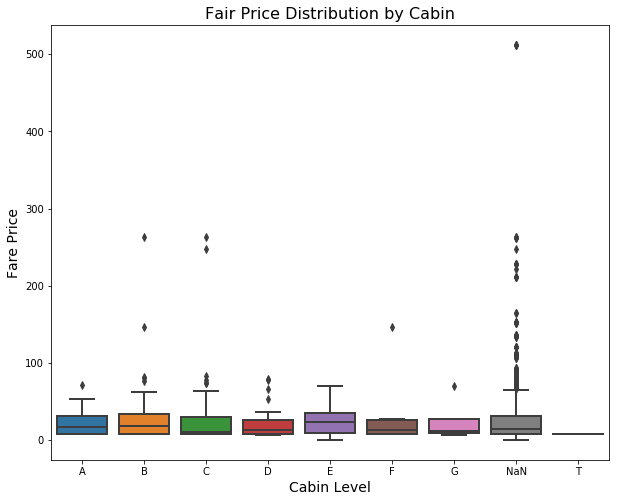

In [57]:
sns.boxplot(x=sorted(traindf["Cabin"]), y=traindf["Fare"], linewidth=2)
plt.xlabel("Cabin Level", fontsize=14)
plt.ylabel("Fare Price", fontsize=14)
plt.title("Fair Price Distribution by Cabin", fontsize=16)

#### Data Cleaning

**Variables to Drop**

- PassengerId- As an arbitrary identifier, it provides no predictive power
- Name- This variable is also an arbitrary 
- Ticket
- Cabin 

**Variables to Transform**

In [ ]:
traindf.iloc[872]

In [ ]:
traindf.Embarked.describe()

In [ ]:
traindf.Embarked.value_counts(dropna=False)

In [ ]:
traindf.dtypes